# Fake News Detection Assignment
**Objective**:

Develop machine learning models to accurately detect fake news. Utilize various algorithms including Decision Tree, Random Forest, XGBoost, ExtraTrees, and LightGBM.

**Dataset**:

[Fake News Dataset from Kaggle](https://www.kaggle.com/c/fake-news/data).

**Steps**:

* Data Loading: Load the dataset using Pandas.
* Preprocessing: Clean and preprocess the text data.
* Feature Extraction: Convert text to numerical data using TF-IDF.
* Data Splitting: Split the dataset into training and testing sets.
* Model Training: Train the models on the training set.
* Evaluation: Evaluate the models using accuracy on the test set.

## Step 1: Loading the Data


In [1]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('train.csv')


print(train_data.head())



C:\Users\Aftab\AppData\Local\Temp\ipykernel_45824\1186750756.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [2]:
def preprocess_data(df):
    
     df=df.dropna(subset=['text','title'])
     
     df['processed_text']=df['text']+' '+df['title']
     
     df['processed_text']=df['processed_text'].astype(str)
     
     return df

train_data = preprocess_data(train_data)

train_data.drop(columns=['text', 'title'], inplace=True)

print(train_data.head())

   id              author  label  \
0   0       Darrell Lucus      1   
1   1     Daniel J. Flynn      0   
2   2  Consortiumnews.com      1   
3   3     Jessica Purkiss      1   
4   4      Howard Portnoy      1   

                                      processed_text  
0  House Dem Aide: We Didn’t Even See Comey’s Let...  
1  Ever get the feeling your life circles the rou...  
2  Why the Truth Might Get You Fired October 29, ...  
3  Videos 15 Civilians Killed In Single US Airstr...  
4  Print \nAn Iranian woman has been sentenced to...  


C:\Users\Aftab\AppData\Local\Temp\ipykernel_45824\474131827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text']=df['text']+' '+df['title']
C:\Users\Aftab\AppData\Local\Temp\ipykernel_45824\474131827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text']=df['processed_text'].astype(str)


In [3]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aftab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Text Preprocessing
In this step, the text data is cleaned and prepared for modeling. 
- Stopwords (common words like "and", "the") are removed as they do not add meaningful information.
- Stemming is applied to reduce words to their root forms (e.g., "running" → "run").
- Regular expressions are used to remove non-alphabetic characters.


In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from multiprocessing import Pool

# آماده‌سازی stopwords و stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Function to clean the text
def clean_text(text):
  # keep only the letters
  text = re.sub('[^a-zA-Z]', ' ', text)
  # make the text lower then split it
  text = text.lower().split()
  # just uncomment the following line and think about what you are doing
  text = [ps.stem(word) for word in text if not word in stop_words]
  text = ' '.join(text)
  return text

# with Pool(processes=8) as pl:
#   train_data['processed_text']  = pl.map(clean_text,train_data['processed_text'])
train_data['processed_text'] = train_data['processed_text'].apply(clean_text)
print(train_data[['processed_text']].head())




                                      processed_text
0  hous dem aid even see comey letter jason chaff...
1  ever get feel life circl roundabout rather hea...
2  truth might get fire octob tension intellig an...
3  video civilian kill singl us airstrik identifi...
4  print iranian woman sentenc six year prison ir...


## Step 3: Feature Extraction


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract features with 5000 features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(train_data['processed_text']).toarray()
y = train_data['label']

## Step 4: Splitting the Data
The dataset is split into training and testing sets to evaluate the model's performance on unseen data.


In [6]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 5: Model Training
### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

### XGBoost

In [9]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### ExtraTrees


In [10]:
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier()
et_classifier.fit(X_train, y_train)

ExtraTreesClassifier()

### LightGBM

In [11]:
from lightgbm import LGBMClassifier

lgb_classifier = LGBMClassifier()
lgb_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7900, number of negative: 8262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.310013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668345
[LightGBM] [Info] Number of data points in the train set: 16162, number of used features: 4996
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488801 -> initscore=-0.044804
[LightGBM] [Info] Start training from score -0.044804


LGBMClassifier()

## Step 6: Evaluation
- Accuracy: Measures the proportion of correctly classified samples.
- ROC AUC: Evaluates the model's ability to distinguish between classes, especially useful for imbalanced datasets.


In [12]:
from sklearn.metrics import accuracy_score

# Example for Random Forest
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:0.2f}')

Accuracy: 0.96


## Step 7: Comparing Model Performance
The bar chart below compares the performance of different machine learning models based on their accuracy. This helps identify the best-performing model for fake news detection.


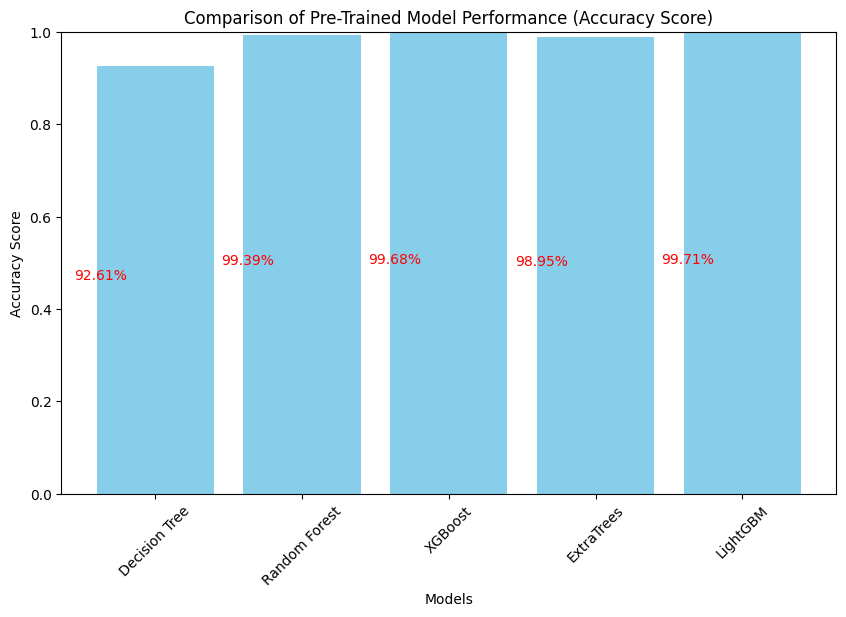

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Function to evaluate a pre-trained model and return its ROC AUC score
def evaluate_pretrained_model(model, X_test, y_test):
    predictions = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predictions)
    return roc_auc

# Dictionary of your pre-trained models
pretrained_models = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,  
    "XGBoost": xgb_classifier,   
    "ExtraTrees": et_classifier,
    "LightGBM": lgb_classifier
}

# Evaluate each pre-trained model and store results
roc_auc_scores = {name: evaluate_pretrained_model(model, X_test, y_test) for name, model in pretrained_models.items()}

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Pre-Trained Model Performance (Accuracy Score)')
plt.ylim([0, 1])  # تنظیم محدوده محور y
plt.xticks(rotation=45)  # چرخاندن اسامی مدل‌ها برای خوانایی بیشتر

# Annotate the bars with their scores
for bar, score in zip(bars, roc_auc_scores.values()):
    plt.text(bar.get_x() - 0.15, bar.get_height() / 2, f'{score*100:.2f}%', color='red', fontsize=10)

plt.show()


## Conclusion
In this project, we explored various machine learning models to detect fake news, starting from data preprocessing to model evaluation. Each step was critical in building an accurate and reliable system. Among the tested models, **XGBoost** performed the best with an accuracy of **99.68%**, making it the ideal choice for this dataset.

This analysis highlights the importance of data cleaning, feature extraction, and model selection in solving text-based problems. The project can be further enhanced by incorporating additional features or using deep learning methods for more robust predictions.
